## Gaussian Process in Machine Learning
<p> <b>Gaussian processes</b> are distributions over functions $f(x)$ of which the distribution is defined by a <code>mean function</code> $m(x)$ and <code>positive definite covariance function</code> $k(x, x')$, with $x$ the function values and $(x, x')$ all possible pairs in the input domain: $$f(x) = GP(m(x), k(x, x'))$$ </p>

<p> where for any finite subset $X = {x_1...x_n}$ of domain of $x$, the <em>marginal distribution</em> is a <b>multivariate Gaussian distribution</b>: $$f(X) = N(m(X), k(X, X))$$ </p>

<p> with mean vector $\mu = m(X)$ and covariance matrix $\sum = k(X, X)$ </p>

<p>While the multivariate Gaussian caputures a finte number of <b>jointly distributed Gaussians</b>, the Gaussian process doesn't have this limitation. Its <code>mean</code> and <code>covariance</code> are defined by a function. Each input to this function is a <b>variable correlated</b> with the other variables in the input domain, as defined by the <code>covariance function</code>. Since functions can have an infinite input domain, the <b>Gaussian process</b> can be interpreted as an infinite dimensional Gaussian random variable. </p>

### **Understanding distribution**
***
<ol>
    <li><b>Univariate normal distribution</b> : Also known as, <code>Gaussian Distribution</code> that based on <font color=Blue>Gaussian Function</font>. 
    </li>
    <ul>
        <li>Distribution defined by 2 parameters: the mean, $\mu$, which is the expected value of the distribution, and thr standard deviation, $\sigma$, which is corresponds to the expected deviation from the mean. Denote the distribution as $$N(\mu, \sigma^2)$$ 
        </li>
        <li>Given the mean and variance, we can calculate the <font color=Red>probability density function (pdf)</font> of the normal distribution with the normalised Gaussian function. For a value $x$ the density is: $$p(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x-\mu)^2}{2\sigma^2} $$ 
        </li>
        <li><code><b>def univariate_normal(x, mean, variance):</b>
    """pdf of the univariate normal distribution."""
    <b>return</b> ((1. / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance)))</code>
        </li>
    </ul><br>
    <li><b>Multivariate normal distribution</b> : <code>Multidimensional generalisation</code> of the 1-dimensional normal distribution. It represents the distribution of a <code>multivariate random variable</code> that is made up of multiple random variables that can be <b><font color=red>correlated</font></b> with each other. 
    </li>
    <ul>
        <li>Like the normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $\mu$, which is the expected value of the distribution; and the covariance matrix $\sum$, which measures how dependend two random variables are and how they change together. We denote the covariance between variable $X$ and $Y$ as $C(X, Y)$.
        </li>
        <li>The multivariate normal with dimensionality $d$ has a joint probability density given by: $$p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)} $$, where $x$ a random vector of size $d$, $\mu$ is the mean vector, $\sum$ is the (<font color=blue>symmetric, positive definite</font>) covariance matrix (of size $d x d$), and $|\sum|$ its determinant. We denote this multivariate normal distribution as: $$N(\mu, \sum)$$
        </li>
        <li><code><b>def multivariate_normal(x, d, mean, covariance):</b>
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    <b>return</b> (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))</code>
        </li>
        <li>Examples of two bivariate normal distributions are plotted below.<br>
            The figure on the left is a bivariate distribution with the <b>covariance</b> between $x1$ and $x2$ and set to 0, so that these 2 variables are <b>independent</b>: $$\mathcal{N}\left(\begin{bmatrix}0 \\0\end{bmatrix}, \begin{bmatrix}1 & 0 \\0 & 1 \end{bmatrix}\right) $$
            The figure on the right is a bivariate distribution with the covariance between $x1$ and $x2$ set to be <b>different</b> than $0$ so that both variables are <b>correlated</b>. Increasing $x1$ will increase the probability that $x2$ will also increase: $$\mathcal{N}\left(\begin{bmatrix}0 \\1\end{bmatrix}, \begin{bmatrix}1 & 0.8 \\0.8 & 1\end{bmatrix}\right)$$
            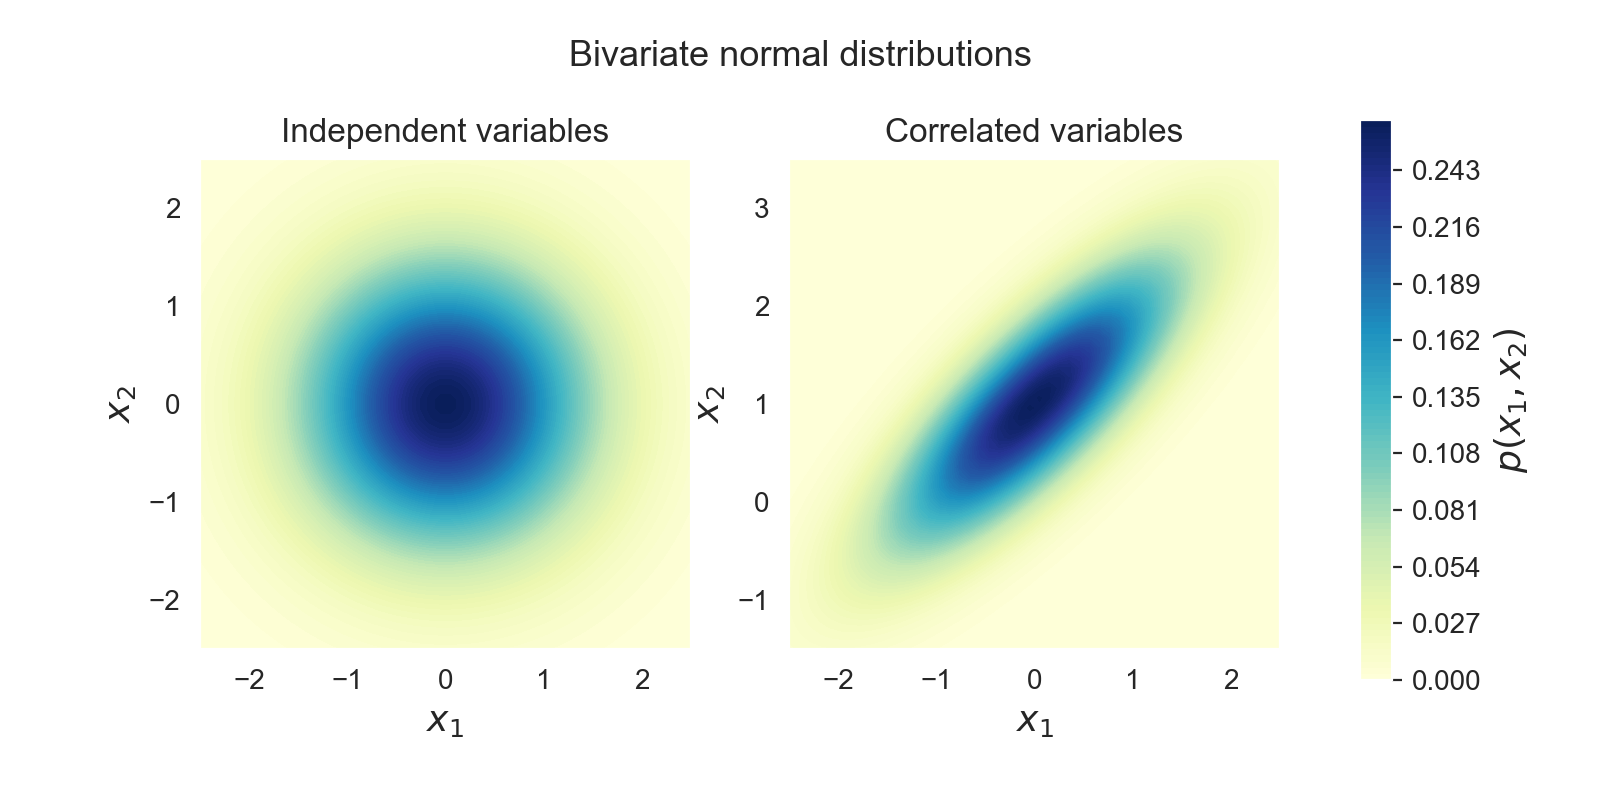
        </li>
    </ul> 
</ol>


### **Covariance function as prior**
***
<p>To sample functions from the Gaussian process we need to define the mean and covariance functions. The covariance function $k(x_a, x_b)$ models the joint variability of the Gaussian process random variables. It returns the modelled <code>covariance</code> between each pair in $x_a$ and $x_b$. </p>

<p>The specification of this covariance function, also known as the <code>kernel function</code>, implies a distribution over functions $f(x)$. By choosing a specific kernel function $k$, it is possible to set <b>prior</b> information on this distribution. This kernel function needs to be <b>positive-definite</b> in order to be a valid <code>covariance</code> function. </p>
<p><b><em><font color=Red>In Bayesian statistical inference, a prior probability distribution, often simply called the prior, of an uncertain quantity is the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account.</font></em></b> </p>

<ol>
    <li><b>Example of kernel function: Model the covariance with the exponentiated quadratic covariance function, known as <code>RBF kernel</code>:</b> $$k(x_a, x_b) = \exp{ \left( -\frac{1}{2\sigma^2} \lVert x_a - x_b \rVert^2 \right)}$$ 
<code><b>def exponentiated_quadratic(xa, xb):</b>
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    <b>return</b> np.exp(sq_norm)
</code>
    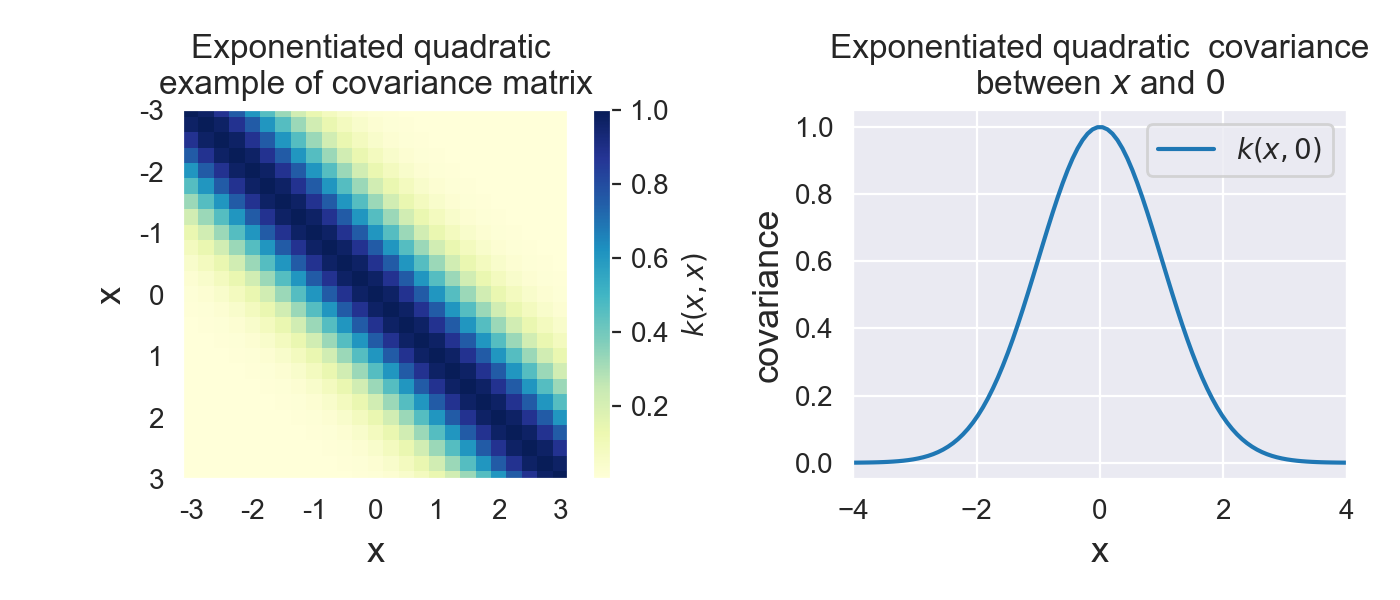
    </li>
</ol>

### Resources
***
<a href="https://peterroelants.github.io/posts/gaussian-process-tutorial/"> Resource on Gaussian Processes </a> <br>
<a href="https://en.wikipedia.org/wiki/Posterior_probability"> Posterior Probability </a> <br>
<a href="https://sempwn.github.io/blog/2016/11/23/notes"> Predicting with Gaussian Processes </a> <br>
<a href="https://distill.pub/2019/visual-exploration-gaussian-processes/#PriorFigure"> Visual Exploration of Gaussian Processes </a> <br>
<a href="https://github.com/jasonweiyi/understanding_gaussian_process"> Understanding Gaussian Processes in Github from Scratch </a> <br>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, clear_output, HTML
import ipywidgets as widgets
from matplotlib import cm
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive
from numpy.linalg import cholesky, det, lstsq
from scipy.optimize import minimize

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

%matplotlib inline

In [2]:
data = pd.read_csv("http://projects.fivethirtyeight.com/general-model/president_general_polls_2016.csv")
data.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


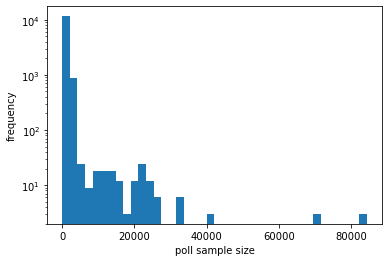

In [3]:
plt.hist(data.samplesize.dropna().values,bins=40);
plt.yscale('log');
plt.ylabel('frequency'); plt.xlabel('poll sample size');

In [4]:
data.forecastdate = pd.to_datetime(data.forecastdate)
data.createddate = pd.to_datetime(data.createddate)

data['time2election'] = pd.to_datetime(data.createddate) - pd.datetime(2016,11,8)
data['time2election'] = data['time2election']/ np.timedelta64(1, 'D')

national_data = data[data.state=='U.S.']
national_data = national_data[np.isfinite(national_data.samplesize)]

In [5]:
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

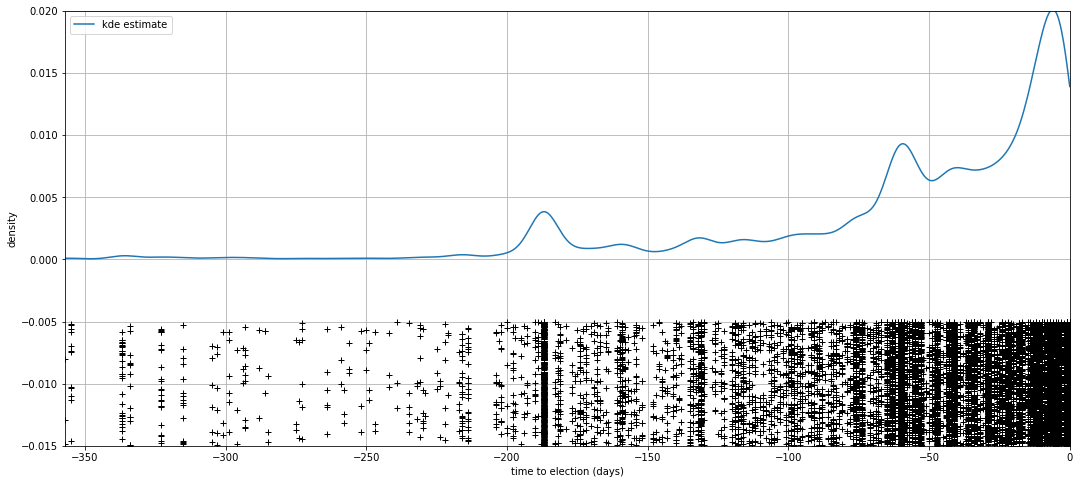

In [6]:
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.atleast_2d(data.time2election).T

X_plot = np.atleast_2d(np.linspace(X.min(), 0, 1000)).T
plt.figure(figsize=(18,8))

kde = KernelDensity(kernel='gaussian', bandwidth=5.0).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
        label="kde estimate")

plt.legend(loc='upper left')
plt.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

plt.xlim(X.min(), 0)
plt.ylim(-0.015, 0.02)
plt.grid()
plt.xlabel('time to election (days)')
plt.ylabel('density')
plt.show()

In [7]:
national_data = national_data[national_data.pollster == 'YouGov']

In [8]:
mpoll = np.mean(national_data.rawpoll_clinton)
sigpoll = 100.
p_clinton = np.array(national_data.rawpoll_clinton/sigpoll)
X = (np.atleast_2d(national_data.time2election).T).astype(float)
y = p_clinton - (mpoll)/sigpoll

dy = p_clinton*(1-p_clinton)/national_data.samplesize.values

In [11]:
#kernel = C(1.0, (1e-3, 1e3)) * RBF(7., (1e-2, 30.))
#kernel = 1.0 * RBF(length_scale=7.0, length_scale_bounds=(1e-2, 30.0))
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

In [12]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

gp.fit(X, y)

GaussianProcessRegressor(alpha=array([6.64728739e-06, 3.23786004e-07, 3.11308358e-05, 3.23790672e-05,
       4.57650740e-03, 2.48202371e-04, 1.94503616e-03, 1.88232518e-04,
       8.89584270e-05, 3.31404611e-03, 8.69871103e-05, 3.12721299e-03,
       3.35714519e-03, 2.61856919e-04, 3.71982846e-03, 2.65297518e-04,
       9.04812255e-05, 9.03101027e-05, 1.16159434e-04, 3.88463491e-03,
       8.82939406e-...
       3.35714519e-03, 2.61856919e-04, 3.71982846e-03, 2.65297518e-04,
       9.04812255e-05, 9.03101027e-05, 1.16159434e-04, 3.88463491e-03,
       8.82939406e-05, 1.57582561e-03, 8.74334846e-05, 1.48838723e-03,
       1.50691085e-03, 6.61004869e-04, 3.45432329e-05, 5.93776856e-04]),
                         copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [13]:
GaussianProcessRegressor(alpha=np.array([  2.91595e-05,   3.03287e-05, ...,   3.15727e-05,   4.14705e-04]),
             copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

GaussianProcessRegressor(alpha=array([2.91595e-05, 3.03287e-05, Ellipsis, 3.15727e-05, 0.000414705],
      dtype=object),
                         copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [14]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
x = np.atleast_2d(np.linspace(-250., 0, 1000)).T
y_pred, sigma = gp.predict(x, return_std=True)

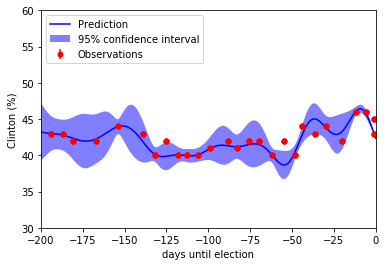

In [15]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
py = sigpoll*y+mpoll
pdy = sigpoll*dy
py_pred = sigpoll*y_pred+mpoll
psigma = sigpoll*sigma
plt.errorbar(X.ravel(), py, pdy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, py_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([py_pred - 1.9600 * psigma,
                        (py_pred + 1.9600 * psigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('days until election')
plt.ylabel('Clinton (%)')
plt.ylim(30., 60.)
plt.xlim(-200.,0.)
plt.legend(loc='upper left')

plt.show()

# Next Step

In [17]:
mpoll = np.mean(national_data.rawpoll_trump)
sigpoll = 100.
p_trump = np.array(national_data.rawpoll_trump/sigpoll)
Ty = p_trump - (mpoll)/sigpoll
#dy = 0.1*np.ones(len(y))/sigpoll#one point error
Tdy = (p_trump*(1-p_trump)/national_data.samplesize.values)

In [18]:
Tgp = GaussianProcessRegressor(kernel=kernel, alpha=(Tdy / Ty) ** 2,
                              n_restarts_optimizer=10)
Tgp.fit(X, Ty)

GaussianProcessRegressor(alpha=array([9.11886675e-06, 2.49799878e-06, 2.26310554e-05, 8.43481434e-05,
       9.61451757e-04, 8.72514199e-04, 5.00757983e-04, 9.91695619e-05,
       7.25290096e-04, 3.50955116e-04, 7.09217684e-04, 1.30797693e-04,
       7.05283059e-04, 3.06116519e-05, 6.33478833e-05, 5.83541059e-05,
       1.46869772e-04, 7.36310491e-04, 1.88550823e-04, 1.62477352e-04,
       3.10138655e-...
       7.05283059e-04, 3.06116519e-05, 6.33478833e-05, 5.83541059e-05,
       1.46869772e-04, 7.36310491e-04, 1.88550823e-04, 1.62477352e-04,
       3.10138655e-05, 1.73645138e-02, 4.60639876e-05, 4.68626053e-05,
       1.59580783e-04, 1.70178566e-04, 4.73870196e-05, 2.16522692e-05]),
                         copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [20]:
GaussianProcessRegressor(alpha=np.array([  2.16801e-05,   7.77431e-05, ...,   4.36763e-05,   2.04680e-05]),
             copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

GaussianProcessRegressor(alpha=array([2.16801e-05, 7.77431e-05, Ellipsis, 4.36763e-05, 2.0468e-05],
      dtype=object),
                         copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [21]:
#Predict for Trump
Ty_pred, Tsigma = Tgp.predict(x, return_std=True)

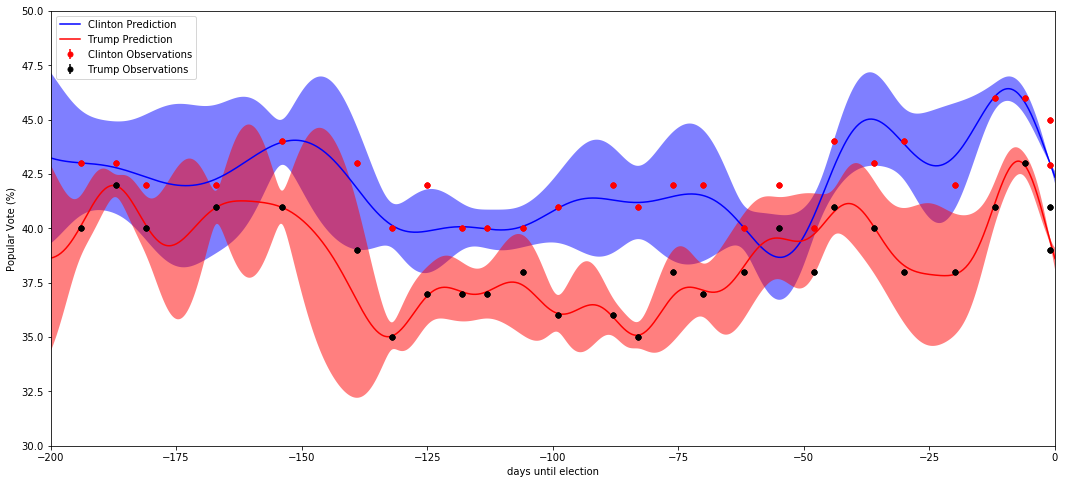

In [22]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure(figsize=(18,8))
Tpy = sigpoll*Ty+mpoll
Tpdy = sigpoll*Tdy
Tpy_pred = sigpoll*Ty_pred+mpoll
Tpsigma = sigpoll*Tsigma
plt.errorbar(X.ravel(), py, pdy, fmt='r.', markersize=10, label=u'Clinton Observations')
plt.plot(x, py_pred, 'b-', label=u'Clinton Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([py_pred - 1.9600 * psigma,
                        (py_pred + 1.9600 * psigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label=None)
plt.errorbar(X.ravel(), Tpy, Tpdy, fmt='k.', markersize=10, label=u'Trump Observations')
plt.plot(x, Tpy_pred, 'r-', label=u'Trump Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([Tpy_pred - 1.9600 * Tpsigma,
                        (Tpy_pred + 1.9600 * Tpsigma)[::-1]]),
         alpha=.5, fc='r', ec='None', label=None)
plt.xlabel('days until election')
plt.ylabel('Popular Vote (%)')
plt.ylim(30., 50.)
plt.xlim(-200.,0.)
plt.legend(loc='upper left');

# Implementation with Numpy (Another Example)

In [48]:
display(Markdown(r'<b>RBF kernel</b>: $$\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp(-\frac{1}{2l^2}(\mathbf{x}_i - \mathbf{x}_j)^T(\mathbf{x}_i - \mathbf{x}_j))$$'))
display(Markdown(r'The length parameter $l$ controls the smoothness of the function and $\sigma_f$ the vertical variation. For simplicity, we use the same length parameter $l$ for all input dimensions (isotropic kernel).'))


def kernel(X1, X2, l=1.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes 
    a covariance matrix from points in X1 and X2.
        
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        Covariance matrix (m x n).
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

<b>RBF kernel</b>: $$\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp(-\frac{1}{2l^2}(\mathbf{x}_i - \mathbf{x}_j)^T(\mathbf{x}_i - \mathbf{x}_j))$$

The length parameter $l$ controls the smoothness of the function and $\sigma_f$ the vertical variation. For simplicity, we use the same length parameter $l$ for all input dimensions (isotropic kernel).

In [32]:
## Define prior functions with mean zero and a covariance matrix computed with kernel parameters $l=1$ and $\sigma_f=1$

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

def plot_gp_2D(gx, gy, mu, X_train, Y_train, title, i):
    ax = plt.gcf().add_subplot(1, 2, i, projection='3d')
    ax.plot_surface(gx, gy, mu.reshape(gx.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)
    ax.scatter(X_train[:,0], X_train[:,1], Y_train, c=Y_train, cmap=cm.coolwarm)
    ax.set_title(title)

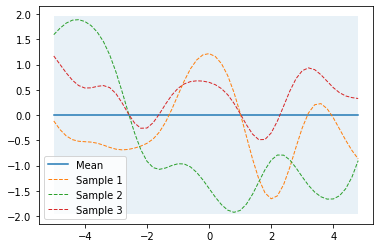

In [33]:
# Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

# Plot GP mean, confidence interval and samples 
plot_gp(mu, cov, X, samples=samples)

In [35]:
def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''  
    Computes the suffifient statistics of the GP posterior predictive distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

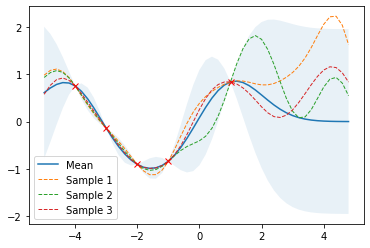

In [36]:
# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

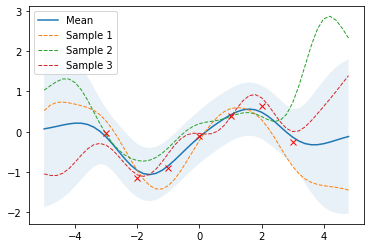

In [39]:
noise = 0.4

# Noisy training data
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=noise)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

<h3>Effect of kernel parameters and noise parameter </h3>

The following example shows the effect of kernel parameters $l$ and σf as well as the noise parameter $\sigma_y$. Higher $l$ values lead to smoother functions and therefore to coarser approximations of the training data. Lower $l$ values make functions more wiggly with wide confidence intervals between training data points. $\sigma_f$ controls the vertical variation of functions drawn from the GP. This can be seen by the wide confidence intervals outside the training data region in the right figure of the second row. $\sigma_y$ represents the amount of noise in the training data. Higher $\sigma_y$ values make more coarse approximations which avoids overfitting to noisy data.

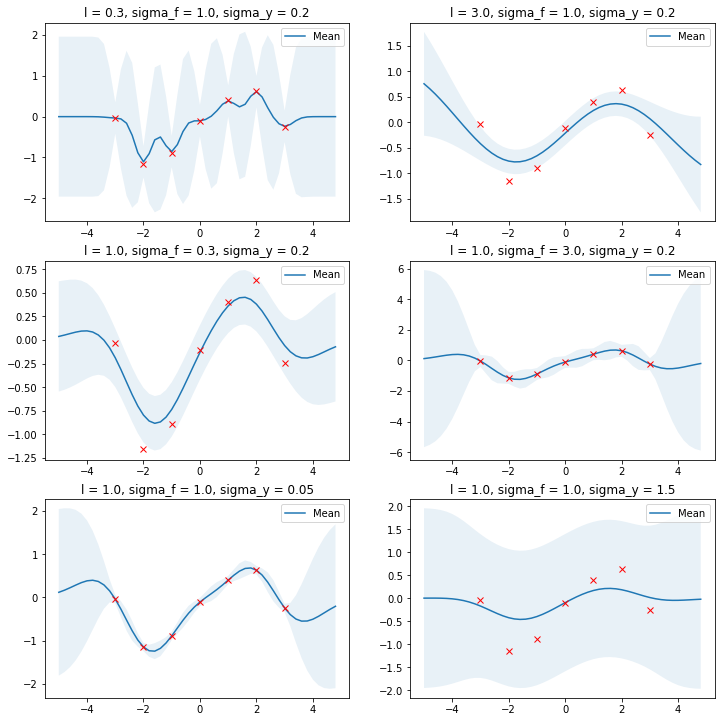

In [41]:
display(Markdown(r'<h3>Effect of kernel parameters and noise parameter </h3>'))
display(Markdown(r'The following example shows the effect of kernel parameters $l$ and σf as well as the noise parameter $\sigma_y$. Higher $l$ values lead to smoother functions and therefore to coarser approximations of the training data. Lower $l$ values make functions more wiggly with wide confidence intervals between training data points. $\sigma_f$ controls the vertical variation of functions drawn from the GP. This can be seen by the wide confidence intervals outside the training data region in the right figure of the second row. $\sigma_y$ represents the amount of noise in the training data. Higher $\sigma_y$ values make more coarse approximations which avoids overfitting to noisy data.'))

params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l, 
                                       sigma_f=sigma_f, 
                                       sigma_y=sigma_y)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'l = {l}, sigma_f = {sigma_f}, sigma_y = {sigma_y}')
    plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

Optimal values for these parameters can be estimated by maximizing the log marginal likelihood which is given by:

$$\log p(\mathbf{y} \lvert \mathbf{X}) = \log \mathcal{N}(\mathbf{y} \lvert \boldsymbol{0},\mathbf{K}_y) =-\frac{1}{2} \mathbf{y}^T \mathbf{K}_y^{-1} \mathbf{y} -\frac{1}{2} \log \begin{vmatrix}\mathbf{K}_y\end{vmatrix} -\frac{N}{2} \log(2\pi) $$

In the following we will minimize the <b>negative log marginal likelihood w.r.t.</b> parameters $l$ and $\sigma_y$, $\sigma_y$ is set to the known noise level of the data. If the noise level is unknown, $\sigma_y$ can be estimated as well along with the other parameters:

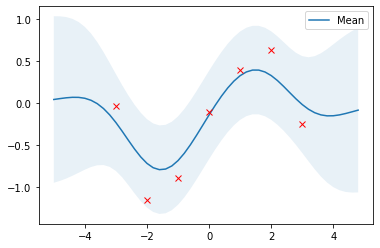

In [51]:
display(Markdown(r'Optimal values for these parameters can be estimated by maximizing the log marginal likelihood which is given by:'))
display(Markdown(r'$$\log p(\mathbf{y} \lvert \mathbf{X}) = \log \mathcal{N}(\mathbf{y} \lvert \boldsymbol{0},\mathbf{K}_y) =-\frac{1}{2} \mathbf{y}^T \mathbf{K}_y^{-1} \mathbf{y} -\frac{1}{2} \log \begin{vmatrix}\mathbf{K}_y\end{vmatrix} -\frac{N}{2} \log(2\pi) $$'))
display(Markdown(r'In the following we will minimize the <b>negative log marginal likelihood w.r.t.</b> parameters $l$ and $\sigma_y$, $\sigma_y$ is set to the known noise level of the data. If the noise level is unknown, $\sigma_y$ can be estimated as well along with the other parameters:'))

def nll_fn(X_train, Y_train, noise, naive=True):
    '''
    Returns a function that computes the negative log marginal
    likelihood for training data X_train and Y_train and given 
    noise level.
    
    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        naive: if True use a naive implementation of Eq. (7), if 
               False use a numerically more stable implementation. 
        
    Returns:
        Minimization objective.
    '''
    def nll_naive(theta):
        # Naive implementation of Eq. (7). Works well for the examples 
        # in this article but is numerically less stable compared to 
        # the implementation in nll_stable below.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        return 0.5 * np.log(det(K)) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    def nll_stable(theta):
        # Numerically more stable implementation of Eq. (7) as described
        # in http://www.gaussianprocess.org/gpml/chapters/RW2.pdf, Section
        # 2.2, Algorithm 2.1.
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        L = cholesky(K)
        return np.sum(np.log(np.diagonal(L))) + \
               0.5 * Y_train.T.dot(lstsq(L.T, lstsq(L, Y_train)[0])[0]) + \
               0.5 * len(X_train) * np.log(2*np.pi)
    
    if naive:
        return nll_naive
    else:
        return nll_stable

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.
res = minimize(nll_fn(X_train, Y_train, noise), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x
l_opt, sigma_f_opt

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

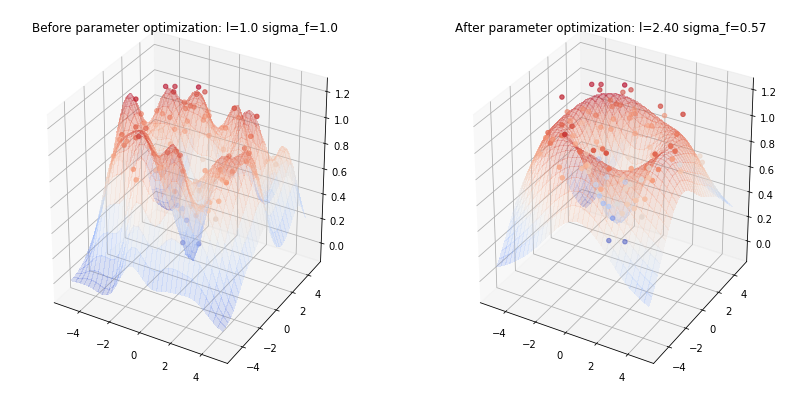

In [52]:
# # Higher Dimentions

noise_2D = 0.1

rx, ry = np.arange(-5, 5, 0.3), np.arange(-5, 5, 0.3)
gx, gy = np.meshgrid(rx, rx)

X_2D = np.c_[gx.ravel(), gy.ravel()]

X_2D_train = np.random.uniform(-4, 4, (100, 2))
Y_2D_train = np.sin(0.5 * np.linalg.norm(X_2D_train, axis=1)) + \
             noise_2D * np.random.randn(len(X_2D_train))

plt.figure(figsize=(14,7))

mu_s, _ = posterior_predictive(X_2D, X_2D_train, Y_2D_train, sigma_y=noise_2D)
plot_gp_2D(gx, gy, mu_s, X_2D_train, Y_2D_train, 
           f'Before parameter optimization: l={1.00} sigma_f={1.00}', 1)

res = minimize(nll_fn(X_2D_train, Y_2D_train, noise_2D), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

mu_s, _ = posterior_predictive(X_2D, X_2D_train, Y_2D_train, *res.x, sigma_y=noise_2D)
plot_gp_2D(gx, gy, mu_s, X_2D_train, Y_2D_train,
           f'After parameter optimization: l={res.x[0]:.2f} sigma_f={res.x[1]:.2f}', 2)